In [110]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [111]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import randint
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

### Import Dataset

In [112]:
df = pd.read_csv("diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62,0,0,25.0,0.587,36,0
638,7,97,76,32,91,40.9,0.871,32,1
558,11,103,68,40,0,46.2,0.126,42,0
183,5,73,60,0,0,26.8,0.268,27,0
315,2,112,68,22,94,34.1,0.315,26,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [114]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


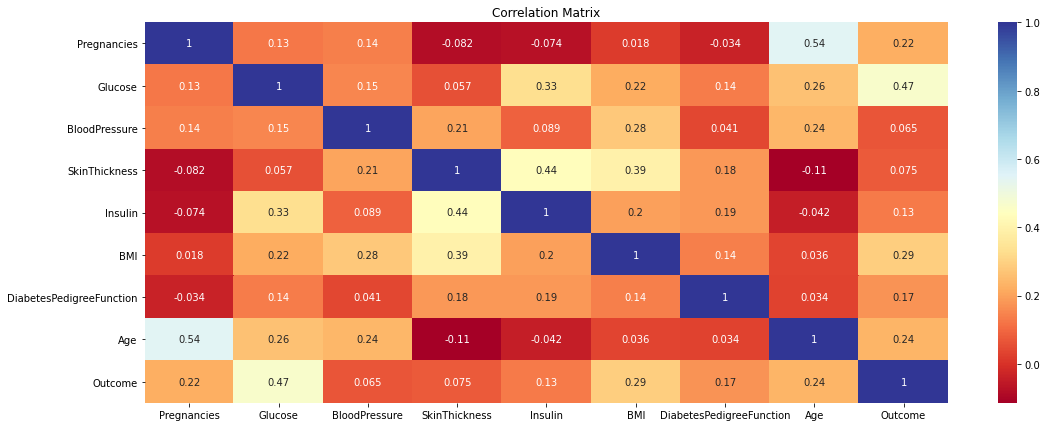

In [115]:

# Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, cmap = "RdYlBu", annot = True)
plt.title("Correlation Matrix")
plt.show()

# Fine Tuning

### K Neighbors Classification

**Features and Target**

In [116]:
X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

**Split into Train and Test Data**

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

**Find Best K value**

In [118]:
k = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    score = accuracy_score(y_test, yhat)
    k.append(score)
k

[0.6883116883116883,
 0.7272727272727273,
 0.6753246753246753,
 0.7229437229437229,
 0.6883116883116883,
 0.7012987012987013,
 0.6926406926406926,
 0.7142857142857143,
 0.7012987012987013]

In [119]:
best_k = k.index(max(k))
print("Best Depth Index = " + str(best_k))
print("Best Depth Accuracy = " + str(k[best_k]))

Best Depth Index = 1
Best Depth Accuracy = 0.7272727272727273


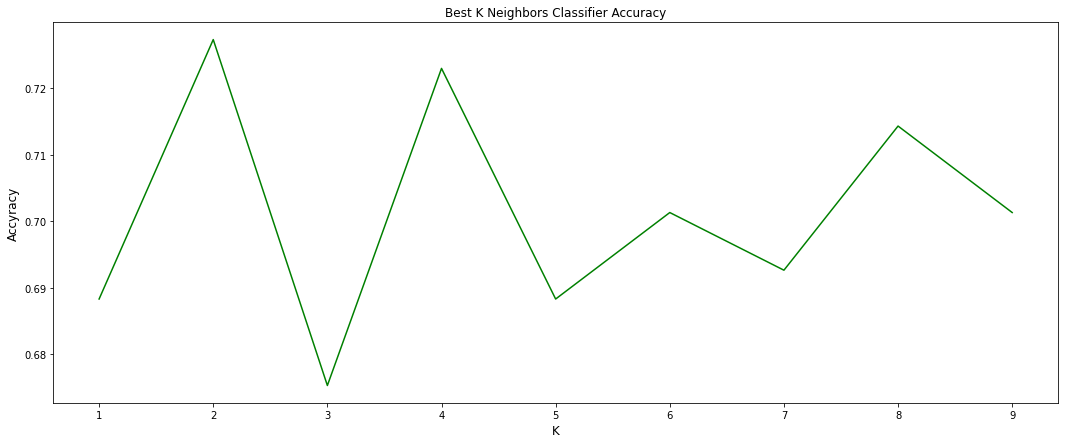

In [120]:
k_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.title("Best K Neighbors Classifier Accuracy")
plt.plot(k_list, k, color = "green")
plt.xlabel("K", size = 12)
plt.ylabel("Accyracy", size = 12)
plt.show()

**Use K = 2**

In [121]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": y_pred})[0:20]

,Actual Outcome,Predicted Outcome
668,0,0
324,0,0
624,0,0
690,0,1
473,0,0
204,0,0
97,0,0
336,0,0
568,0,0
148,0,0


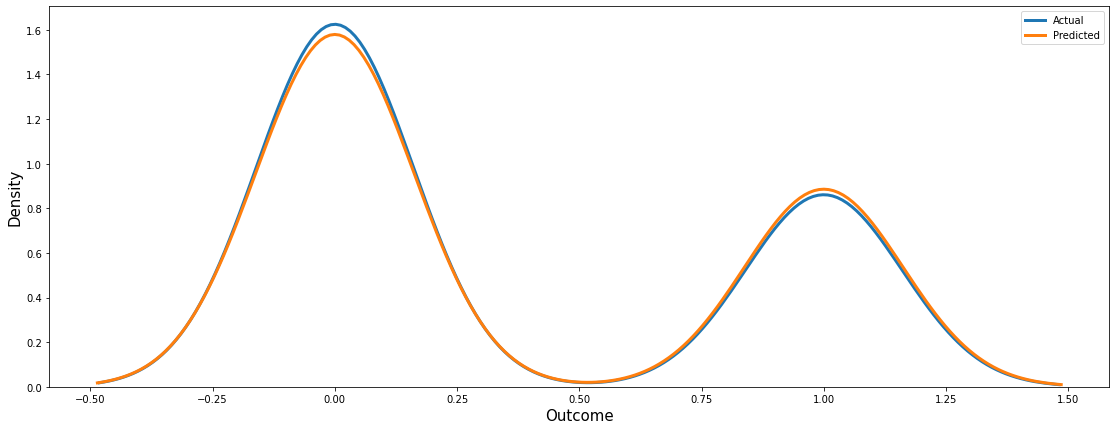

In [122]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3)
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [123]:
print(confusion_matrix(y_test, y_pred))

[[136  15]
 [ 48  32]]


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       151
           1       0.68      0.40      0.50        80

    accuracy                           0.73       231
   macro avg       0.71      0.65      0.66       231
weighted avg       0.72      0.73      0.71       231



In [125]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 32  48]
 [ 15 136]]


Confusion matrix, without normalization
[[ 32  48]
 [ 15 136]]


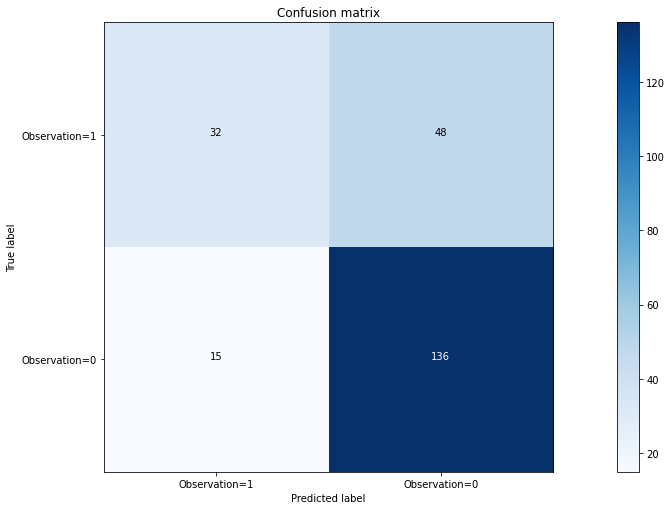

In [126]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize = (18, 7))
plot_confusion_matrix(cnf_matrix, classes=['Observation=1','Observation=0'],normalize= False,  title='Confusion matrix')

### Logistic Regression and the ROC Curve

**Feature and Target variables**

In [127]:
X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

In [128]:
# Logistic Regression Object
log_reg = LogisticRegression()

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)
# Fit data in logistic regression Object
log_reg.fit(x_train, y_train)

# Test Outcome of Test Data
y_pred = log_reg.predict(x_test)

# Actual vs Predicted
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": y_pred})[0:20]

,Actual Outcome,Predicted Outcome
668,0,0
324,0,0
624,0,0
690,0,0
473,0,1
204,0,0
97,0,0
336,0,1
568,0,1
148,0,1


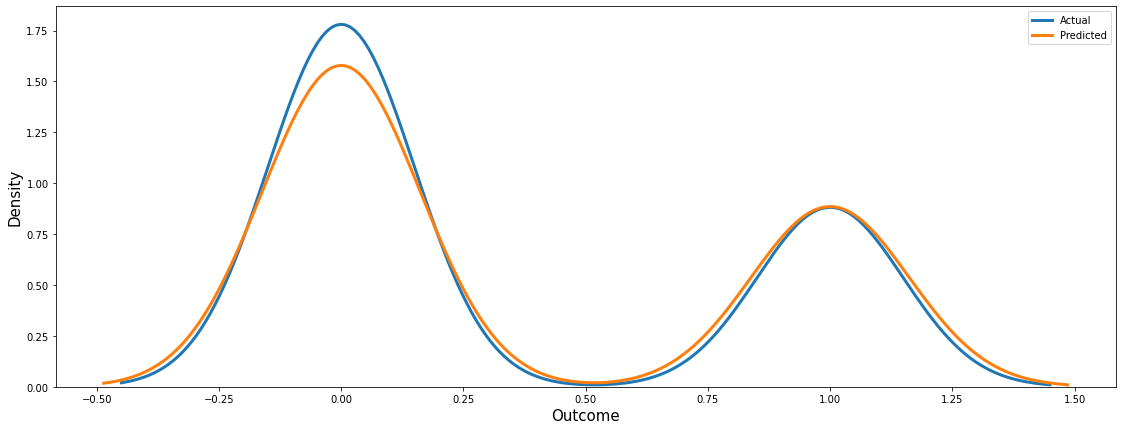

In [129]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3)
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [130]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 0.7662337662337663


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



Confusion matrix, without normalization
[[ 66  36]
 [ 36 170]]


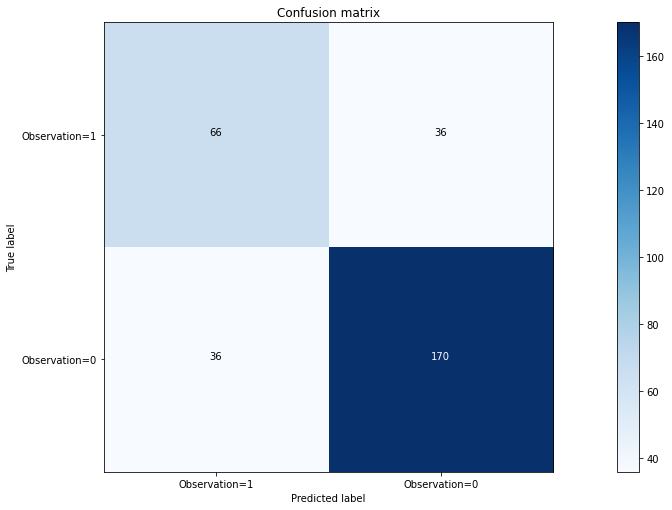

In [132]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize = (18, 7))
plot_confusion_matrix(cnf_matrix, classes=['Observation=1','Observation=0'],normalize= False,  title='Confusion matrix')

### Plotting the ROC Curve

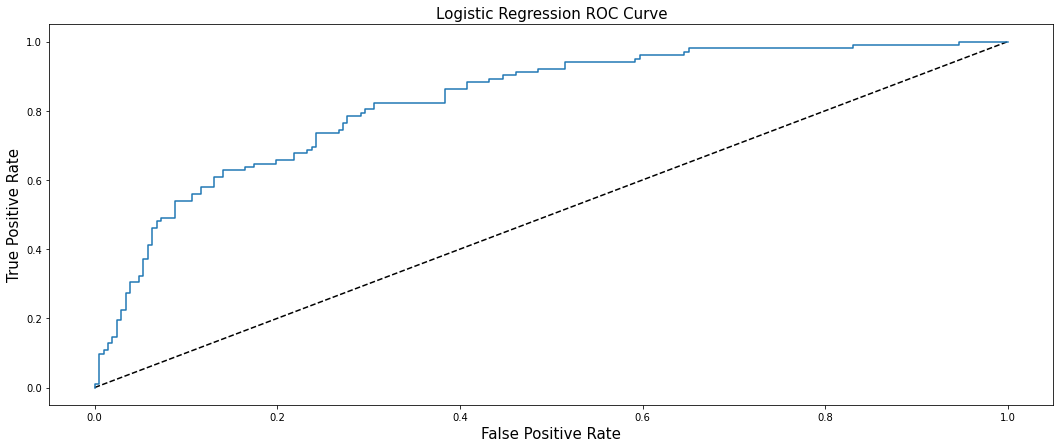

In [133]:
y_pred_prob = log_reg.predict_proba(x_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

plt.figure(figsize = (18, 7))
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate", size = 15)
plt.ylabel("True Positive Rate", size = 15)
plt.title("Logistic Regression ROC Curve", size = 15)
plt.show()

### Area Under Curve

**Features and Target Variables**

In [134]:
X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

In [135]:
# Logistic Regression Object
logreg = LogisticRegression()

# Split data in train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)

# Fit model in training set
logreg.fit(x_train, y_train)

# Pass lasbels and predicted probabilities to roc auc curve
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

score = roc_auc_score(y_test, y_pred_prob)
print("Score =", score)

Score = 0.8260517799352751


**AUC using Cross Validation**

In [136]:
# Cross Validation
cv_scores = cross_val_score(logreg,
                            X,
                            y,
                            cv = 5,
                            scoring = "roc_auc")
print(cv_scores)

[0.81 0.81 0.83 0.87 0.83]


# Hyperparameter Tuning

### Grid Search Cross Validation (K Neighbors Classification)

In [137]:
X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

In [138]:
# Hyperparameters
param_grid = {"n_neighbors": np.arange(1, 50)}

# K Neighbors Classifier Object
knn = KNeighborsClassifier()

# Grid Search CV model
knn_cv = GridSearchCV(knn, param_grid, cv = 5)

# Fit  model in training set
knn_cv.fit(X, y)

# best parameter
knn_cv.best_params_

{'n_neighbors': 14}

In [139]:
# Best Score
knn_cv.best_score_

0.7578558696205755

In [140]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": y_pred})[0:20]

,Actual Outcome,Predicted Outcome
668,0,0
324,0,0
624,0,0
690,0,1
473,0,0
204,0,0
97,0,0
336,0,0
568,0,1
148,0,0


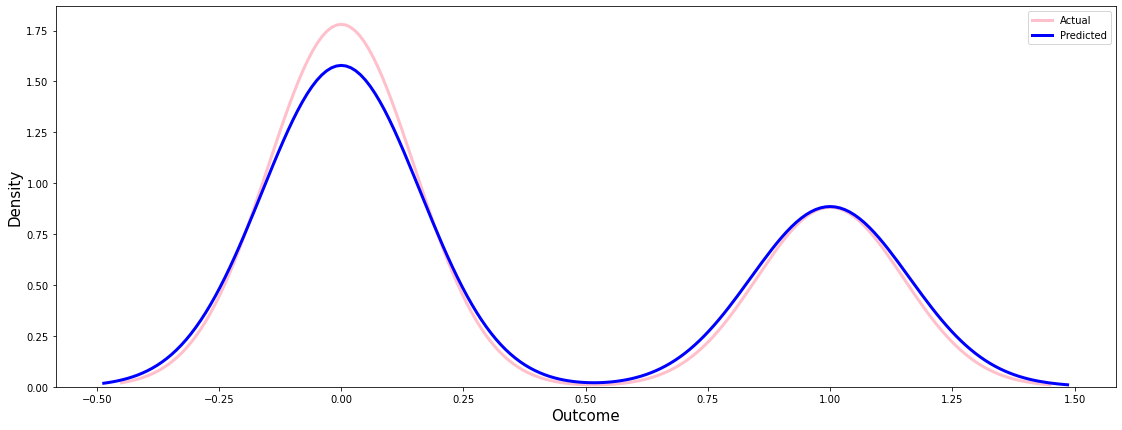

In [141]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3,color = "pink")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "blue")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       206
           1       0.65      0.42      0.51       102

    accuracy                           0.73       308
   macro avg       0.70      0.65      0.66       308
weighted avg       0.72      0.73      0.72       308



Confusion matrix, without normalization
[[ 43  59]
 [ 23 183]]


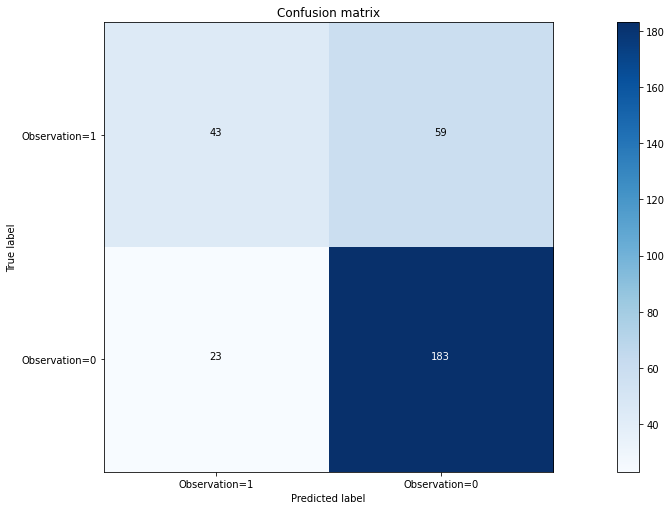

In [143]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize = (18, 7))
plot_confusion_matrix(cnf_matrix, classes=['Observation=1','Observation=0'],normalize= False,  title='Confusion matrix')

### Grid Search Cross Validation (Logistic Regression)

In [144]:
X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

In [145]:
# Hyperparameters
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ["l1", "l2"]}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)
# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit the model into data
logreg_cv.fit(x_train, y_train)

# Tuned Logistic Regression Parameters
print("Tuned Logistic Regression Parameters =", logreg_cv.best_params_, "\n")
print("Best score is =", logreg_cv.best_score_)

Tuned Logistic Regression Parameters = {'C': 2275.845926074791, 'penalty': 'l2'} 

Best score is = 0.7760869565217391


In [146]:
y_pred = logreg_cv.predict(x_test)
score = logreg_cv.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R-Squared = {score}", "\n")
print(f"Mean Squared Error = {mse}")

R-Squared = 0.775974025974026 

Mean Squared Error = 0.22402597402597402


In [147]:
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": y_pred})[0:20]

,Actual Outcome,Predicted Outcome
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
204,0,0
97,0,0
336,0,1
568,0,1
148,0,1


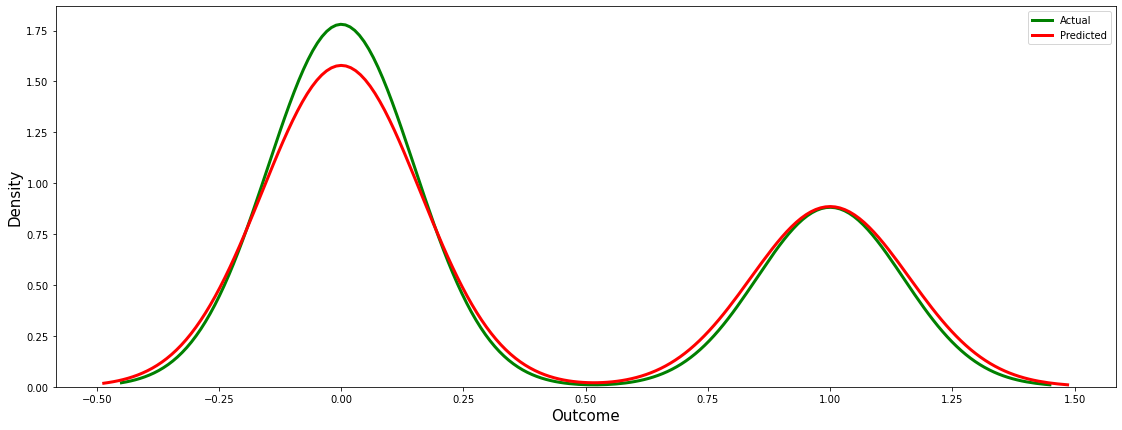

In [148]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3, color = "green")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.66      0.66      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



Confusion matrix, without normalization
[[ 67  35]
 [ 34 172]]


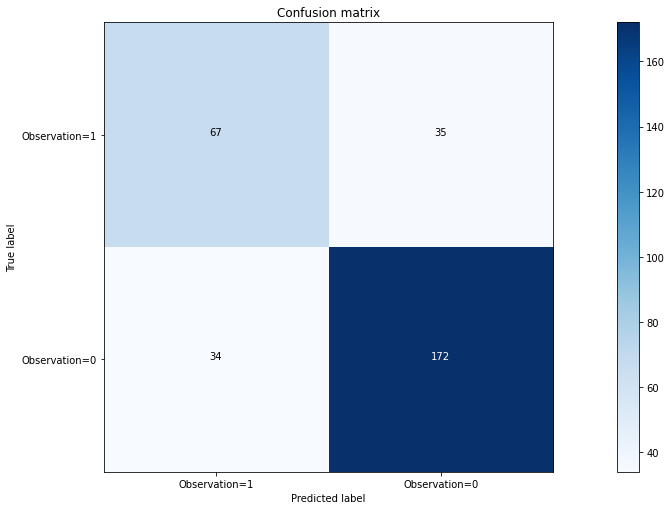

In [150]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize = (18, 7))
plot_confusion_matrix(cnf_matrix, classes=['Observation=1','Observation=0'],normalize= False,  title='Confusion matrix')

### Elastic Net Model: l1 ration (GridSearchCV)

In [151]:
X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

In [152]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {"l1_ratio": l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv = 5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)

# Model Score
r2 = gm_cv.score(X_test, y_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)


print(f"Tuned ElasticNet l1 ration = {gm_cv.best_params_}", "\n")
print(f"Tuned ElasticNet R squared = {r2}", "\n")
print(f"Tuned ElasticNet MSE = {mse}")

Tuned ElasticNet l1 ration = {'l1_ratio': 0.06896551724137931} 

Tuned ElasticNet R squared = 0.18868478465673866 

Tuned ElasticNet MSE = 0.183667618698049


### Hyperparameter tuning with RandomizedSearchCV

**Decision Tree Classification**

In [153]:
X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

In [154]:
# Setup the parameters
param_dist = {"max_depth": range(1, 10),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters
print("Tuned Decision Tree Parameters =", tree_cv.best_params_, "\n")

# Best score
print("Best Score is =", tree_cv.best_score_)

Tuned Decision Tree Parameters = {'criterion': 'gini', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 7} 

Best Score is = 0.7279093455564044


In [155]:
# Actual Outcome vs Predicted Outcome
yhat = tree_cv.predict(X)
pd.DataFrame({"Actual Outcome": y, "Predicted Outcome": yhat})[0:20]

,Actual Outcome,Predicted Outcome
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,0
7,0,0
8,1,1
9,1,0


In [156]:
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       500
           1       0.77      0.54      0.64       268

    accuracy                           0.78       768
   macro avg       0.78      0.73      0.74       768
weighted avg       0.78      0.78      0.77       768



Confusion matrix, without normalization
[[145 123]
 [ 43 457]]


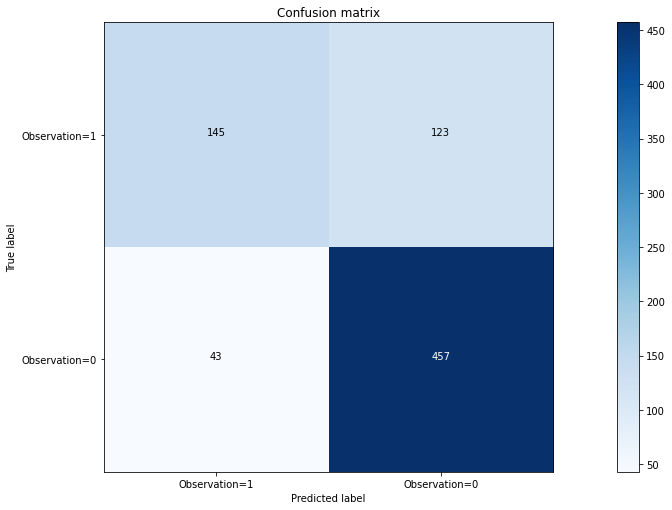

In [157]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize = (18, 7))
plot_confusion_matrix(cnf_matrix, classes=['Observation=1','Observation=0'],normalize= False,  title='Confusion matrix')

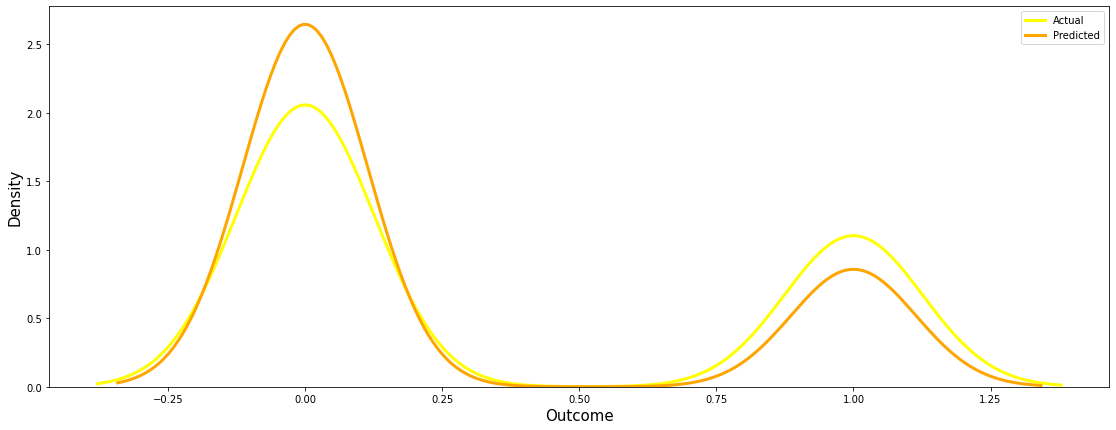

In [158]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y, label = "Actual", linewidth = 3, color = "yellow")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "orange")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()